In [2]:
"""
Создание модели для оценки качества вина
Необходимо построить регрессионную модель на базе нейронных сетей, которая позволяет оценивать качество вина на основе физико-химического анализа составляющих вина.

Подробное описание полей доступно по ссылке:
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
"""

'\nСоздание модели для оценки качества вина\nНеобходимо построить регрессионную модель на базе нейронных сетей, которая позволяет оценивать качество вина на основе физико-химического анализа составляющих вина.\n\nПодробное описание полей доступно по ссылке:\nhttps://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009\n'

In [45]:
!pip install tensorflow
!pip install pandas
!pip install -U scikit-learn

You should consider upgrading via the '/Users/silach53/.pyenv/versions/3.10.5/bin/python3.10 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/silach53/.pyenv/versions/3.10.5/bin/python3.10 -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 10.3 MB/s eta 0:00:0000:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
You should consider upgrading via the '/Users/silach53/.pyenv/versions/3.10.5/bin/python3.10 -m pip install --upgrade pip' command.


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, f1_score, confusion_matrix, 
                             mean_squared_error, r2_score)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
df = pd.read_csv("winequality-red.csv")


In [47]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [48]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [49]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             mean_squared_error, mean_absolute_error, r2_score,
                             confusion_matrix)
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Загрузка и подготовка данных
df = pd.read_csv("winequality-red.csv")
X = df.drop('quality', axis=1)
y = df['quality']

# Масштабирование и разделение
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 1. Нейронная сеть
model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')
])
model_nn.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = model_nn.fit(X_train, y_train-3, epochs=50,
                      batch_size=32, validation_split=0.2, verbose=0)

# 2. Дерево решений с кросс-валидацией
tree = DecisionTreeClassifier(max_depth=10)
y_pred_tree = cross_val_predict(tree, X_scaled, y, cv=5)

# Предсказания
y_pred_nn = model_nn.predict(X_test).argmax(axis=1) + 3
y_pred_tree_test = cross_val_predict(tree, X_test, y_test, cv=5)

/Users/silach53/.pyenv/versions/3.10.5/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/Users/silach53/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [51]:
# Функция расчета метрик
def calculate_metrics(y_true, y_pred, model_name):
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='macro'),
        'Recall': recall_score(y_true, y_pred, average='macro'),
        'F1': f1_score(y_true, y_pred, average='macro'),
        'MSE': mean_squared_error(y_true, y_pred),
        'MAE': mean_absolute_error(y_true, y_pred),
        'R2': r2_score(y_true, y_pred)
    }
    
    try:
        metrics['MAPE'] = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    except:
        metrics['MAPE'] = np.nan
    
    return metrics

In [52]:
# Сбор результатов
results = [
    calculate_metrics(y_test, y_pred_nn, 'Нейронная сеть'),
    calculate_metrics(y_test, y_pred_tree_test, 'Дерево решений')
]


/Users/silach53/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


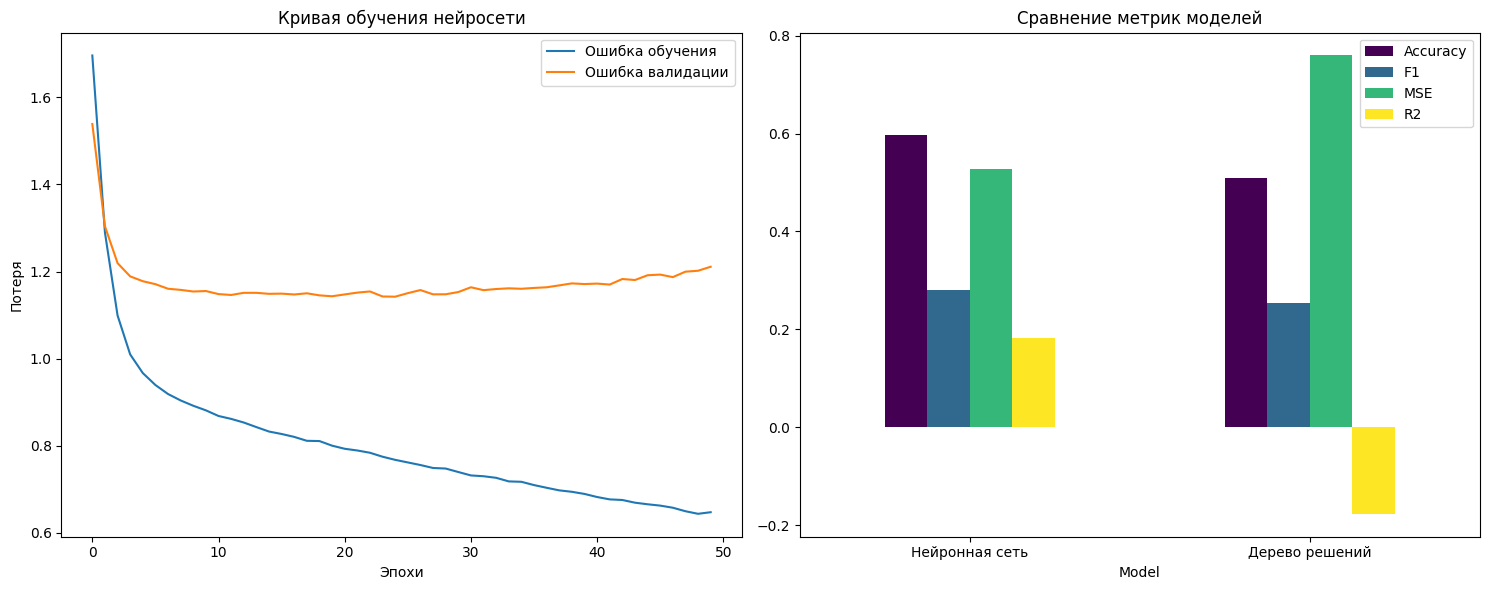

In [53]:
# Визуализация
plt.figure(figsize=(15, 6))

# График обучения нейросети
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Ошибка обучения')
plt.plot(history.history['val_loss'], label='Ошибка валидации')
plt.title('Кривая обучения нейросети')
plt.xlabel('Эпохи')
plt.ylabel('Потеря')
plt.legend()

# Сравнение метрик
metrics_df = pd.DataFrame(results).set_index('Model')
plt.subplot(1, 2, 2)
metrics_df[['Accuracy', 'F1', 'MSE', 'R2']].plot(kind='bar', 
                                                ax=plt.gca(), 
                                                colormap='viridis')
plt.title('Сравнение метрик моделей')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [54]:
print("Полная таблица метрик:")
display(metrics_df)

Полная таблица метрик:


,Accuracy,Precision,Recall,F1,MSE,MAE,R2,MAPE
Model,,,,,,,,
Нейронная сеть,0.596875,0.294899,0.278431,0.280610,0.528125,0.440625,0.181549,8.047619
Дерево решений,0.509375,0.254275,0.253954,0.254058,0.759375,0.578125,-0.176827,10.520833


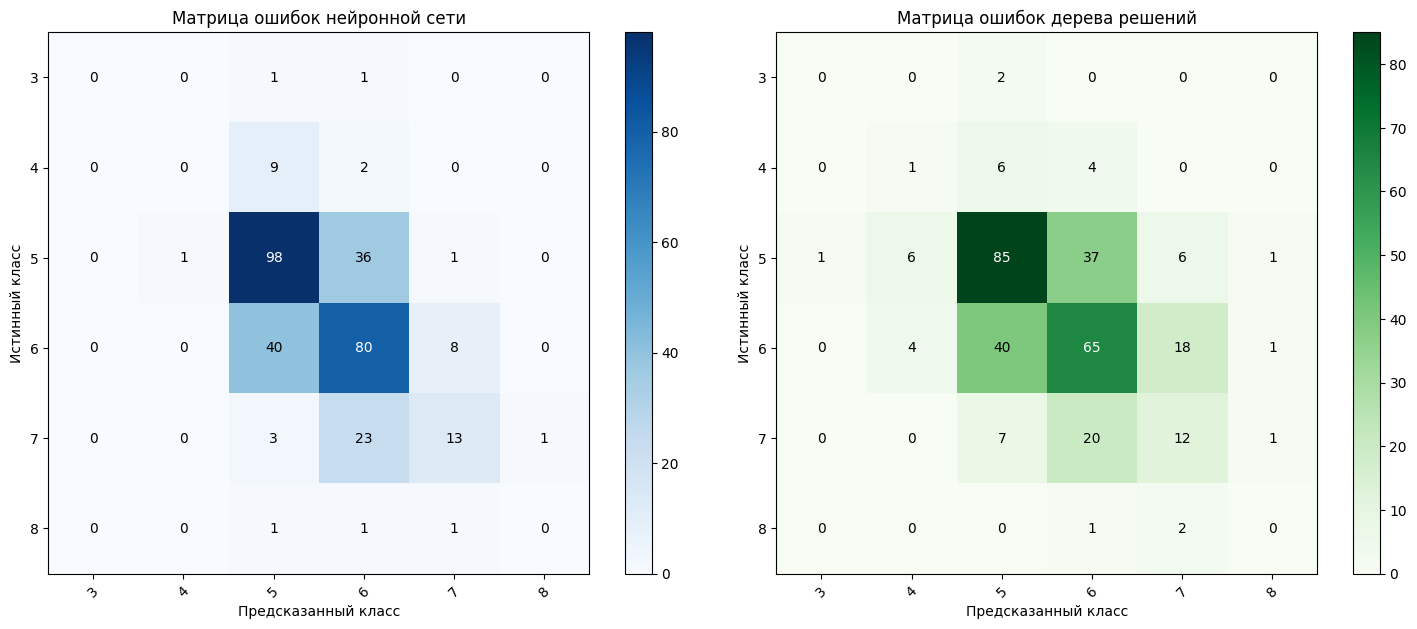

In [55]:
# После получения предсказаний и перед plt.show()

# Создаем фигуру для матриц ошибок
plt.figure(figsize=(15, 6))

# Матрица ошибок для нейронной сети
plt.subplot(1, 2, 1)
cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.imshow(cm_nn, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Матрица ошибок нейронной сети')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y), rotation=45)
plt.yticks(tick_marks, np.unique(y))
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')

# Добавляем текстовые аннотации
thresh = cm_nn.max() / 2.
for i in range(cm_nn.shape[0]):
    for j in range(cm_nn.shape[1]):
        plt.text(j, i, format(cm_nn[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm_nn[i, j] > thresh else "black")

# Матрица ошибок для дерева решений
plt.subplot(1, 2, 2)
cm_tree = confusion_matrix(y_test, y_pred_tree_test)
plt.imshow(cm_tree, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Матрица ошибок дерева решений')
plt.colorbar()
plt.xticks(tick_marks, np.unique(y), rotation=45)
plt.yticks(tick_marks, np.unique(y))
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')

# Добавляем текстовые аннотации
thresh = cm_tree.max() / 2.
for i in range(cm_tree.shape[0]):
    for j in range(cm_tree.shape[1]):
        plt.text(j, i, format(cm_tree[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm_tree[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


# Решающее дерево плохо показывает себя, r^2\<0

In [58]:
!pip install numpy==1.23.5
!pip install xgboost

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
Found existing installation: catboost 1.2.7
Uninstalling catboost-1.2.7:
  Successfully uninstalled catboost-1.2.7
  Using cached numpy-1.23.5-cp310-cp310-macosx_11_0_arm64.whl (13.4 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
You should consider upgrading via the '/Users/silach53/.pyenv/versions/3.10.5/bin/python3.10 -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 2.2 MB/s eta 0:00:0000:0100:010m
You should consider upgrading via the '/Users/silach53/.pyenv/versions/3.10.5/bin/python3.10 -m pip install --upgrade pip' command.


In [62]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


# 1. Random Forest
rf = RandomForestClassifier(n_estimators=200,
                           max_depth=8,
                           random_state=42,
                           class_weight='balanced')
# Для Random Forest
y_pred_rf = cross_val_predict(rf, X_scaled, y, cv=5, n_jobs=1)

In [68]:
# Правильное разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

# Обучение и предсказания для нейросети
model_nn.fit(X_train, y_train-3, epochs=50, batch_size=32, verbose=0)
y_pred_nn = model_nn.predict(X_test).argmax(axis=1) + 3

# Обучение и предсказания для Random Forest
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Сравнение метрик на тестовой выборке
results = [
    calculate_metrics(y_test, y_pred_nn, 'Нейронная сеть'),
    calculate_metrics(y_test, y_pred_rf, 'Random Forest'),
]

metrics_df = pd.DataFrame(results).set_index('Model')
print("Сравнение моделей:")
display(metrics_df.sort_values('F1', ascending=False))


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Сравнение моделей:


/Users/silach53/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  def _prf_divide(
/Users/silach53/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  def _prf_divide(


,Accuracy,Precision,Recall,F1,MSE,MAE,R2,MAPE
Model,,,,,,,,
Random Forest,0.63125,0.392614,0.384324,0.385027,0.468750,0.400000,0.273564,7.56808
Нейронная сеть,0.63750,0.314033,0.318275,0.315680,0.496875,0.403125,0.229978,7.47433


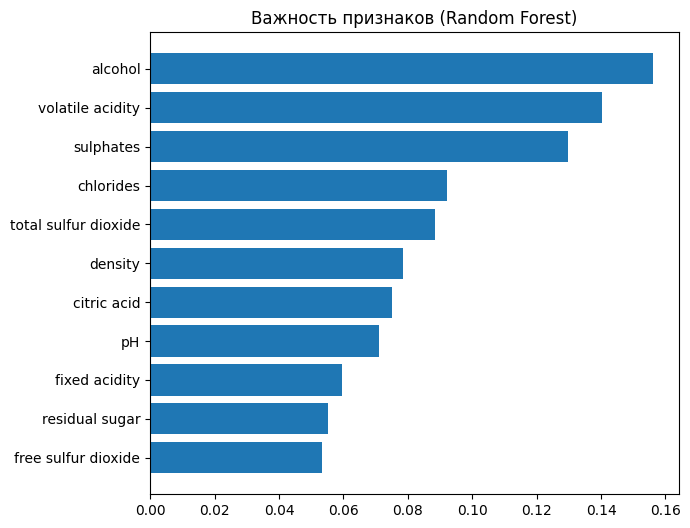

In [69]:
# Визуализация важности признаков
plt.figure(figsize=(15,6))

# Для Random Forest
plt.subplot(1,2,1)
rf.fit(X_scaled, y)
importances = rf.feature_importances_
sorted_idx = np.argsort(importances)
plt.barh(range(X.shape[1]), importances[sorted_idx], align='center')
plt.yticks(range(X.shape[1]), df.columns[sorted_idx])
plt.title('Важность признаков (Random Forest)')

plt.show()

In [70]:
# Выводим обновленную таблицу метрик
metrics_df = pd.DataFrame(results).set_index('Model')
print("Сравнение моделей после улучшений:")
display(metrics_df.sort_values('F1', ascending=False))


Сравнение моделей после улучшений:


,Accuracy,Precision,Recall,F1,MSE,MAE,R2,MAPE
Model,,,,,,,,
Random Forest,0.63125,0.392614,0.384324,0.385027,0.468750,0.400000,0.273564,7.56808
Нейронная сеть,0.63750,0.314033,0.318275,0.315680,0.496875,0.403125,0.229978,7.47433


In [ ]:
#Стало лучше